## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Feb. 21, 2019 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Oct. 16, 2018 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, SGDRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

In [50]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [51]:
#Save the 'Id' column
train_ID = data_train['Id']
test_ID = data_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)

In [52]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


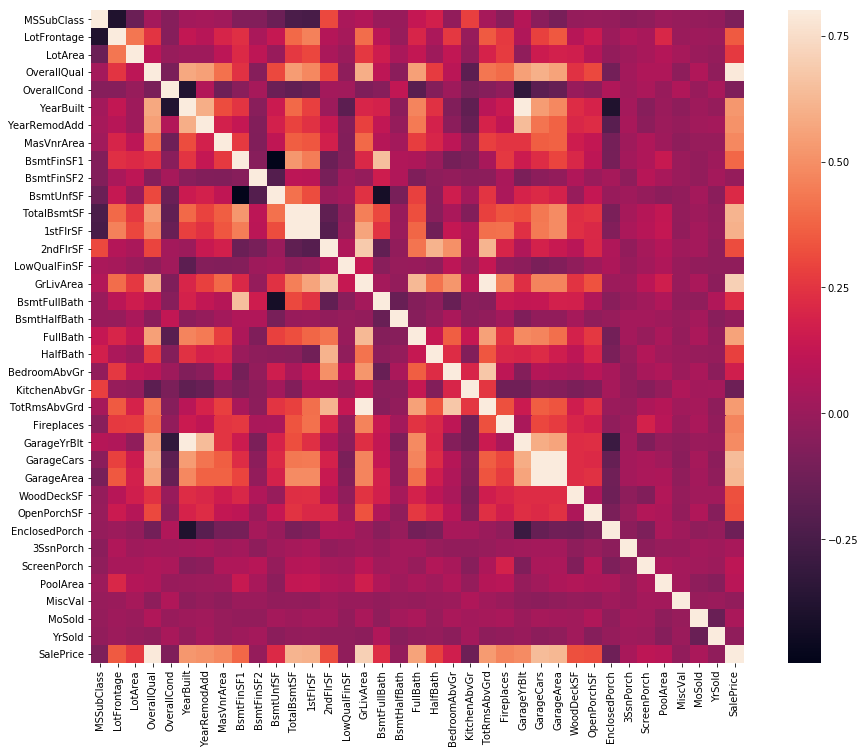

In [53]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

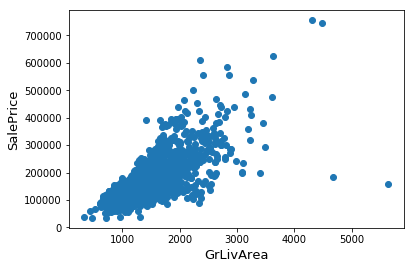

In [54]:
#Graph Sale Price and Area and look for outliers
fig, ax = plt.subplots()
ax.scatter(x = data_train['GrLivArea'], y = data_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

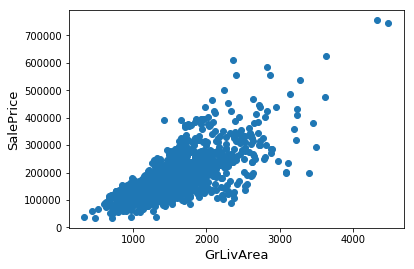

In [55]:
#Deleting outliers
data_train = data_train.drop(data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data_train['GrLivArea'], data_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [56]:
#Look at the missing data
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


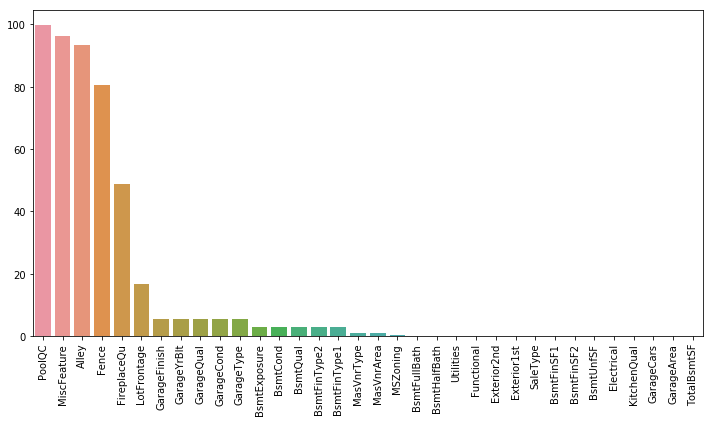

In [57]:
#dealing with missing data
all_data = pd.concat((data_train.drop(["SalePrice"], axis=1), data_test))
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index, y=all_data_na)

In [58]:
#Fill in the missing data
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#Drop data that is not needed or is strongly correlated with other variable
all_data = all_data.drop(['Utilities'], axis=1)
all_data = all_data.drop(['GarageYrBlt'], axis=1)
#all_data = all_data.drop(['LandSlope'], axis=1)
#all_data = all_data.drop(['Exterior2nd'], axis=1)

In [59]:
# Adding total square footage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [60]:
#Get all the numerical variables
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TotalSF'],
      dtype='object')

In [61]:
#Check for skewness with the numerical variables
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
#Log the skewed features
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [62]:
#Create dummy variables for all the categorical features
all_data = pd.get_dummies(all_data)

In [63]:
#We will now create our training and testing data again
train = all_data[:data_train.shape[0]]
test = all_data[data_train.shape[0]:]

#We will log the sale price
data_train["SalePrice"] = np.log1p(data_train["SalePrice"])

#Save the sale prices from the training set
y_train = data_train.SalePrice

# Models

In [64]:
#Validation function I found online
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [65]:
#Scale everything
scaler = StandardScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [66]:
#Linear Regression
linear_regression = SGDRegressor(tol=.0001, eta0=.01)

linear_regression.fit(scaled_train, y_train)
lin_pred = linear_regression.predict(scaled_train)
lin_mse = mean_squared_error(y_train, lin_pred)
print("RMSE: {}".format(np.sqrt(lin_mse)))

RMSE: 17.210153559287196


In [67]:
#LASSO Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

lasso.fit(scaled_train, y_train)
lasso_pred = lasso.predict(scaled_train)
lasso_mse = mean_squared_error(y_train, lasso_pred)
print("RMSE: {}".format(np.sqrt(lasso_mse)))

RMSE: 0.09042305825073033


In [68]:
#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

ENet.fit(scaled_train, y_train)
ENet_pred = ENet.predict(scaled_train)
ENet_mse = mean_squared_error(y_train, ENet_pred)
print("RMSE: {}".format(np.sqrt(ENet_mse)))

RMSE: 0.09032815808177941


In [81]:
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

KRR.fit(scaled_train, y_train)
KRR_pred = KRR.predict(scaled_train)
KRR_mse = mean_squared_error(y_train, KRR_pred)
print("RMSE: {}".format(np.sqrt(KRR_mse)))

RMSE: 0.05530370817498205


In [70]:
#Gradiant Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(scaled_train, y_train)
GBoost_pred = GBoost.predict(scaled_train)
GBoost_mse = mean_squared_error(y_train, GBoost_pred)
print("RMSE: {}".format(np.sqrt(GBoost_mse)))

RMSE: 0.050475755117462294


In [82]:
#XGBoost Regression
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(scaled_train, y_train)
xgb_pred = model_xgb.predict(scaled_train)
xgb_mse = mean_squared_error(y_train, xgb_pred)
print("RMSE: {}".format(np.sqrt(xgb_mse)))

RMSE: 0.07861256721400217


In [72]:
#Averaging Model function I found online
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

# Final Predictions

### Average Model

#### This submission had a rank of 956 and a public score of 0.12007

In [ ]:
#Using averaged models on four different models
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

averaged_models.fit(scaled_train, y_train)
averaged_pred = averaged_models.predict(scaled_train)
averaged_mse = mean_squared_error(y_train, averaged_pred)
print("RMSE: {}".format(np.sqrt(averaged_mse)))

In [ ]:
#Prediction using the testing data
final_pred = np.expm1(averaged_models.predict(scaled_test))

In [ ]:
#Create submission
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = final_pred
sub.to_csv('submission.csv',index=False)

### Ensemble Model

#### This submission had a rank of 895 and a public score of 0.11943

In [95]:
#Get the predictions using the average model and the xgb model
xgb_final = np.expm1(model_xgb.predict(scaled_test))
averaged_final = np.expm1(averaged_models.predict(scaled_test))

In [96]:
#Combine the two predictions together
ensemble = averaged_final*0.70 + xgb_final*0.30

In [97]:
#Create submission
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('ensemble.csv',index=False)

### Different combination for Ensemble

#### This submission had a rank of 843 and a public score of 0.11862

In [112]:
#Using averaged models on three different models
averaged3 = AveragingModels(models = (ENet, GBoost, lasso))

averaged3.fit(scaled_train, y_train)
averaged3_pred = averaged3.predict(scaled_train)
averaged3_mse = mean_squared_error(y_train, averaged3_pred)
print("RMSE: {}".format(np.sqrt(averaged3_mse)))

RMSE: 0.07263786559098571


In [113]:
#Prediction using the testing data
pred = np.expm1(averaged3.predict(scaled_test))

In [114]:
#Combine the two predictions together
ensemble2 = pred*0.70 + xgb_final*0.30

In [115]:
#Create submission
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble2
sub.to_csv('ensemble2.csv',index=False)

# Final Thoughts

For this assignment, I did a ton of trial and error.  I haven't used very many models before so I did a lot of searching on the internet.  I found lots of new models that I had never even heard of before.  I did lots of testing to see which models best predicted the training data.  The models that were fairly successful, I kept.  The models that were not successful, I deleted.  After many hours of trial and error, I finally was able to narrow down to a handful of models that were successful in predicting the data. 

From there, I used a averaging model function that I found online to average four of the best models I found.  I then combined those results with the results from the XGBoost model I used.  That combination (which I called the ensemble) had the best prediction with the testing data. I then did different combinations until I found the combination that was the most successful.  

Based on the results, my model was fairly successful in predicting housing prices.  Obviously, there is always room for improvement.  There may be better ways to test for bias or high variance that I did not use, but I was very wary about overfitting and I tried my hardest to stay away from that.  Overall, I am fairly confident in my results. 

I think this model is extremely useful to use.  I would like to use it with other data sets and see how well it is able to predict housing prices.  But I would be very confident in taking this model to a company for them to use.  There always are going to be edge cases, but how to handle edge cases will be very dependent on who is asking for the model.  Different people will want to handle edge cases differently so it's hard to determine now how to best work with edge cases without more information. But using this model to find the average is extemely useful. 
